# Decision Trees
55377f5b65d7c82726ee8a0460)



Student: Noa Pereira Prada Schnor

Student ID: A00326381

### Dataset Overview:
#### Name: Estimation of Obesity Levels Based On Eating Habits and Physical Condition
#### Purpose:
This dataset is primarily used to estimate obesity levels among individuals from Mexico, Peru, and Colombia by analysing their eating habits and physical activity.
#### Data Generation:
- **77%** of the data was generated **synthetically** using the **Weka** tool and the **SMOTE** filter, while **23%** of the data was **collected directly** from users via a **web platform**.
    
#### Target Variable:
- **Name:** NObeyesdad
- **Description:** Ordinal variable created based on the **Body Mass Index (BMI)**. The dataset classifies individuals into 7 NObeyesdad categories, from Insufficient Weight to Obesity Type III.

#### Feature Variables:
The feature variables are related to eating habits attributes, physical activity attributes and additional attributes, such as gender and age. All the attributes are listed below.

##### Eating Habits Attributes:
The following attributes are related to the **eating habits** of individuals:
- **Frequent consumption of high-caloric food (FAVC)** - binary: Yes/No
- **Frequency of consumption of vegetables (FCVC)** - categorical: Never, Sometimes, Always
- **Number of main meals (NCP)** - categorical: Between 1 and 2, Three, More than three
- **Consumption of food between meals (CAEC)** -categorical: No, Sometimes, Frequently, Always
- **Consumption of water daily (CH20)** -categorical: Less than a litre, Between 1 and 2 L, More than 2 L
- **Consumption of alcohol (CALC)**

##### Physical Activity Attributes:
The attributes related to the **physical activity** of individuals include:
- **Calories consumption monitoring (SCC)** - binary: Yes/No
- **Physical activity frequency (FAF)** - categorical: I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days
- **Time using technology devices (TUE)** - categorical: 0–2 hours, 3–5 hours, More than 5 hours
- **Transportation used (MTRANS)** - categorical: Automobile, Motorbike, Bike, Public Transportation, Walking


##### Additional Attributes:
Other variables obtained in the dataset are:
- **Gender** - binary: Male/Female
- **Age** - numerical, in years
- **Height** - numerical, in metres
- **Weight** - numerical, in kilograms
- **Smoke(SMOKE)** - binary: yes/no
- **Family History of Obesity(family_history_with_overweight)** - binary: Yes/No


#### Additional Resources:
For detailed information and studies related to this dataset, please refer to the following sources:
- [UCI Machine Learning Repository: Estimation of Obesity Levels Based On Eating Habits and Physical Condition Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)
- [Dataset for Estimation of Obesity Levels Based on Eating Habits and Physical Condition](https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011)
- The full paper can be accessed from [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6710633/).

### Import libraries

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #to split into the training and test data
from sklearn import metrics #to calculate accuracy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #to check the prediction expected vs predicted
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

### Load Data and Exploration

In [7]:
#Read the csv file
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")

In [8]:
#Check first  rows of the dataset
df.head() 

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

- The target variable (Nobeyesdad) is a categorical/ordinal variable
- Features: mixed data type - categorical, binary, and continuous (numerical)

In [10]:
#Check number of instances and columns
df.shape

(2111, 17)

- Instances: 2111
- No. columns: 17 (including the Target variable)

In [12]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- No missing data
- All columns with 2111 data entries/instances
- 9 Non-numerical columns with Dtype 'object' - categorical
- 8 Numerical columns float-type

In [14]:
#Check the statistical summary of numerical columns
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

-  Data spread: wide spread of Weight (from 39 to 173 kg)
-  It seems that not only adults are included in this dataset, the Age ranges from 14 to 61

In [16]:
#Check the distributions of the categories of the target variable
print(df.NObeyesdad.value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


- Fairly balanced distribution across Obesity Level categories

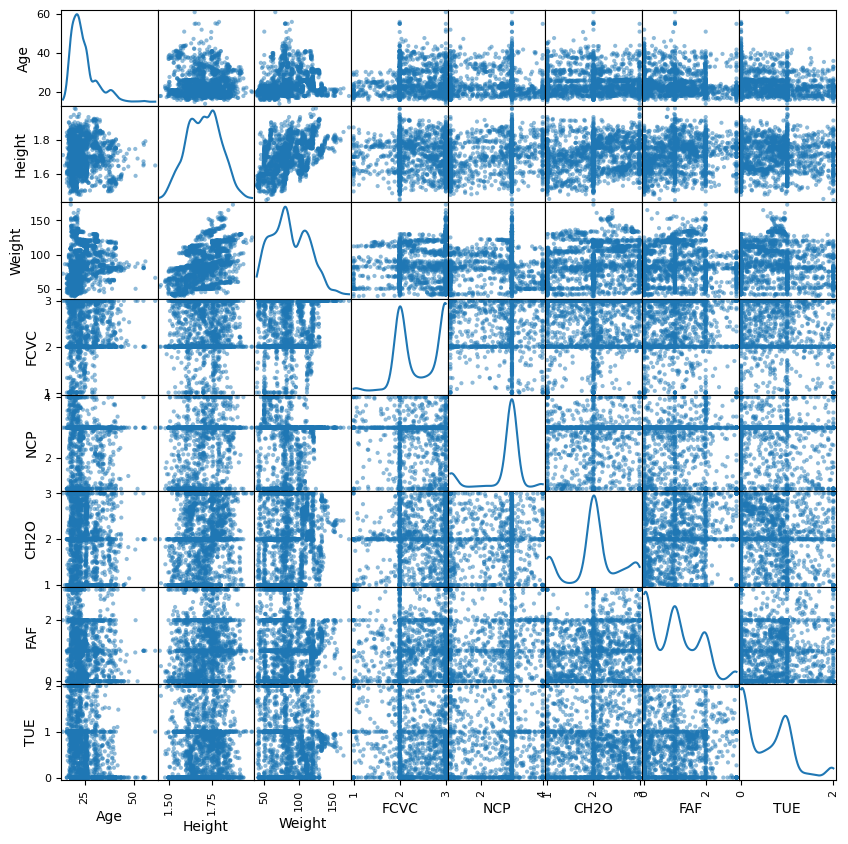

In [18]:
#Explore the relationships among numerical variables
scatter_matrix(df, figsize=(10, 10), diagonal='kde')  # 'kde' to show kernel density on the diagonal
# Save the figure
plt.savefig('plots/DecisionTrees/DT_scatter_matrix.png')
plt.show()

- Age distribution - right-skewed: most individuals are younger with fewer older individuals
- Height/Weight more normal-like distribution
- Variables like FCVC, NCP, and CH2O have distinct peaks, suggesting certain preferences or habits may dominate the dataset (like eating habits or water consumption). 
- There don’t appear to be strong linear relationships between these lifestyle factors and physical attributes like height, weight, or age.
- Weight vs. Age: older individuals possibly weigh more, but there doesn’t appear to be a strong correlation.
- Weight vs. Height: positive correlation, as expected. Taller individuals generally weigh more.

In [20]:
# Define mappings
frequency_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
binary_mapping = {'no': 0, 'yes': 1}

# Columns to map
frequency_columns = ['CALC', 'CAEC']
binary_columns = ['family_history_with_overweight', 'SMOKE', 'FAVC', 'SCC']

# Apply mappings to frequency columns
for col in frequency_columns:
    # Convert column to lowercase string and map
    df[col] = df[col].astype(str).map(frequency_mapping)
    
    # Check for any missing values introduced by the mapping
    print(f"Column {col} missing values after mapping:", df[col].isna().sum())

# Apply mappings to binary columns
for col in binary_columns:
    # Convert column to lowercase string and map
    df[col] = df[col].astype(str).map(binary_mapping)
    
    # Check for any missing values introduced by the mapping
    print(f"Column {col} missing values after mapping:", df[col].isna().sum())

# Combine transformed columns
transformed_columns = frequency_columns + binary_columns


# One-hot encode 'MTRANS' and 'Gender' in one line
df = pd.get_dummies(df, columns=['MTRANS', 'Gender'], prefix=['MTRANS', 'Gender'])

# Check the first 5 rows of the transformed DataFrame
df.head()

Column CALC missing values after mapping: 0
Column CAEC missing values after mapping: 0
Column family_history_with_overweight missing values after mapping: 0
Column SMOKE missing values after mapping: 0
Column FAVC missing values after mapping: 0
Column SCC missing values after mapping: 0


Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   CAEC  SMOKE  CH2O  ...  TUE  CALC           NObeyesdad  MTRANS_Automobile  \
0     1      0   2.0  ...  1.0     0        Normal_Weight              False   
1     1      1   3.0  ...  0.0     1        Normal_Weight              False   
2     1      0   2.0  ...  1.0     2        Normal_Weight              False   
3     1      0   2.0  ...  0.0     2   Overweight_Level_I              False   
4     1      0   2.0  ...  0.0     1  Overweight_Level_II              False   

  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
0       False             False                          True           False   
1       False             False                          True           False   
2       False             False                          True           False   
3       False             False                         False            True   
4       False             False                          True           False   

   Gender_Female  Gender_Male  
0           True        False  
1           True        False  
2          False         True  
3          False         True  
4          False         True  

[5 rows x 22 columns]

- Categorical features were encoded
- Target variable is an ordinal variable and not encoded. The model will be run with not encoded and encoded target variable to check what is the best approach with the target variable (it should encoded or not to get a better model performance?)

### Modelling

#### Non encoded target variable (NObeyesdad)

In [24]:
# Defining the features
X = df.drop(['NObeyesdad'], axis=1)  # Dropping the target variable

In [25]:
#Defining the target variable
y = df['NObeyesdad']

In [26]:
#Splitting the data (training, test data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

In [27]:
#Create the model and fit the training data
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
#Predict the response for test dataset
y_hat = tree.predict(X_test)

In [29]:
#Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 0.9261363636363636


In [30]:
# Check the depth of the tree after fitting
print(f"Depth of the tree: {tree.get_depth()}")

Depth of the tree: 11


In [31]:
#Create cm for a non-encoded target variable 

feature_names = X.columns
print(feature_names)

target_names = ["Obesity_Type_I", "Obesity_Type_II","Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II", "Normal_Weight", "Insufficient_Weight"] #name of all possible values for obesity field

#Confusion matrix
cm= confusion_matrix(y_test,y_hat)

# Convert the confusion matrix to a DataFrame with target names as row and column labels
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

# Print the confusion matrix with labels
print("Confusion Matrix:")
print(cm_df)

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Female',
       'Gender_Male'],
      dtype='object')
Confusion Matrix:
                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Obesity_Type_I                   64                4                 0   
Obesity_Type_II                   4               62                 0   
Obesity_Type_III                  0                0                79   
Overweight_Level_I                0                0                 1   
Overweight_Level_II               0                0                 1   
Normal_Weight                     0                3                 0   
Insufficient_Weight               0                0                 1   

                     Overweight_Level_I  Overweight_Lev

- Good classification ability, especially in categories like Obesity_Type_III and Overweight_Level_II, where correct classification rates are very high.
- The misclassifications happen between normal weight and insufficient weight, and obesity I and II.

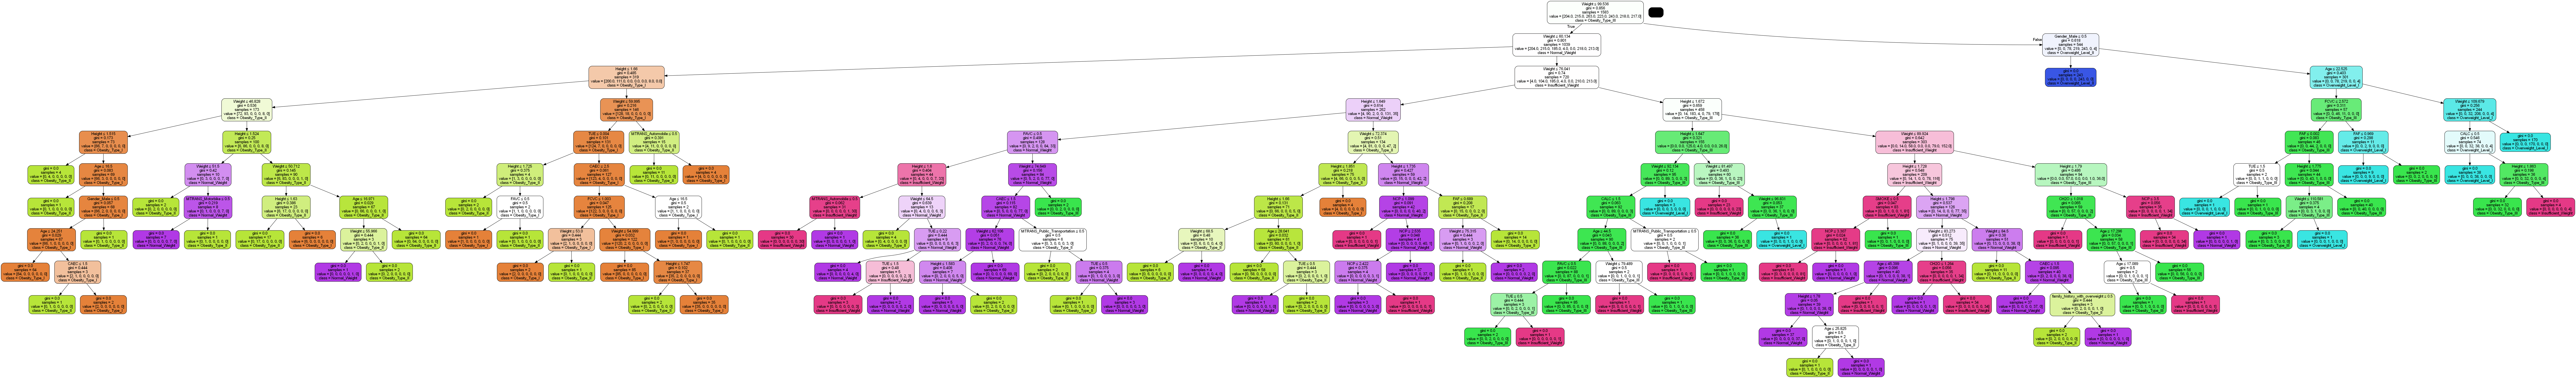

In [33]:
#Check the splits, gini values, and how the features were used of all the levels
dot_data = StringIO()

# Corrected export_graphviz call
export_graphviz(
    tree, 
    out_file=dot_data, 
    filled=True, 
    rounded=True,  # Capital "T"
    special_characters=True,  # Correct spelling
    feature_names=feature_names, 
    class_names=target_names
)

# Creating the graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save figure
graph.write_png('plots/DecisionTrees/obesityDecisionTree_not_encoded.png')


# Displaying the image
Image(graph.create_png())

In [34]:
# Perform 5-fold cross-validation on the decision tree model and print the accuracy for each fold
scores = cross_val_score(tree, X_train, y_train, cv=5)

In [35]:
# Print the accuracy scores for each fold to see the model's performance on each subset of the data
print(scores)

# Calculate and print the mean accuracy across all folds to get an overall cross-validation accuracy estimate
print(scores.mean())

[0.93690852 0.90851735 0.95899054 0.93037975 0.92721519]
0.93240226809887


In [36]:
#Cross-validation helps ensure that the model generalizes well to unseen data. 

accuracy_depths = []

# Loop through the depths and calculate both cross-validation and training accuracy
for d in range(1, 20):
    tree = DecisionTreeClassifier(max_depth=d)
    
    # Cross-validation accuracy (using 5-fold CV)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean_cv_score = scores.mean()
    
    # Fit the model on the full training set to compute training accuracy
    tree.fit(X_train, y_train)
    train_predictions = tree.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    # Store both accuracies and the depth
    accuracy_depths.append((mean_cv_score, train_accuracy, d))
    
    # Printing the CV and Training accuracies
    print(f"Depth {d}: Cross Validation Accuracy = {mean_cv_score:.4f}, Training Accuracy = {train_accuracy:.4f}")


# Finding the maximum cross-validation accuracy
max_accuracy = max(accuracy_depths, key=lambda x: x[0])[0]

# Finding all depths that have the maximum accuracy
best_depths = [d for cv_score, train_accuracy, d in accuracy_depths if cv_score == max_accuracy]

# Printing the depth with the highest Cross Validation accuracy 
print(f"\nMaximum Cross-Validation Accuracy: {max_accuracy:.4f} at Depth(s): {best_depths}")

Depth 1: Cross Validation Accuracy = 0.2912, Training Accuracy = 0.2912
Depth 2: Cross Validation Accuracy = 0.5521, Training Accuracy = 0.5527
Depth 3: Cross Validation Accuracy = 0.6406, Training Accuracy = 0.6519
Depth 4: Cross Validation Accuracy = 0.7637, Training Accuracy = 0.7789
Depth 5: Cross Validation Accuracy = 0.8256, Training Accuracy = 0.8560
Depth 6: Cross Validation Accuracy = 0.8913, Training Accuracy = 0.9394
Depth 7: Cross Validation Accuracy = 0.9027, Training Accuracy = 0.9533
Depth 8: Cross Validation Accuracy = 0.9318, Training Accuracy = 0.9886
Depth 9: Cross Validation Accuracy = 0.9305, Training Accuracy = 0.9981
Depth 10: Cross Validation Accuracy = 0.9299, Training Accuracy = 0.9994
Depth 11: Cross Validation Accuracy = 0.9349, Training Accuracy = 1.0000
Depth 12: Cross Validation Accuracy = 0.9311, Training Accuracy = 1.0000
Depth 13: Cross Validation Accuracy = 0.9305, Training Accuracy = 1.0000
Depth 14: Cross Validation Accuracy = 0.9229, Training Accur

- The Best Cross-Validation accuracy is at Depth 11, however, the training accuracy reaches 100% from depth 11, and the cross-validation does not change much from depth 10. To avoid overfitting the depth 10 could be chosen.


#### Encoded target variable (NObeyesdad)

In [39]:
#Encoding the target variable to check if there is any change/improvement in the model performance

#Check unique values of the target variable
print(df['NObeyesdad'].unique())

#Category order mapping
category_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

#Assign digits to the target variable
y_encoded = df['NObeyesdad'].map(category_order)

#Check the encoded target variable
print(y_encoded)

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64


In [40]:
#Splitting the data (training, test data)
X_train,X_test,y_train_encoded,y_test_encoded = train_test_split(X,y_encoded,test_size=0.25,random_state=1,stratify=y)

In [41]:
#Create the model and fit the training data
tree_encoded = DecisionTreeClassifier()
tree_encoded.fit(X_train,y_train_encoded)

DecisionTreeClassifier()

In [42]:
#Predict the response for the test dataset
y_hat_encoded = tree_encoded.predict(X_test)

In [43]:
#Model Accuracy, how often is the classifier correct?
accuracy_encoded = metrics.accuracy_score(y_test_encoded, y_hat_encoded)
print("Accuracy:", accuracy_encoded)

Accuracy: 0.9375


In [44]:
# Check the depth of the tree after fitting
print(f"Depth of the tree: {tree_encoded.get_depth()}")

Depth of the tree: 11


- The model seems to behave quite similarly to the encoded target variable (same depth).
- The model score had a slight improvement (from 0.9318 to 0.9337)
- The model handles well categorical target variable
- The model was able to capture most patterns even without explicit ordinal encoding.

In [46]:
scores_encoded = cross_val_score(tree_encoded, X_train, y_train_encoded, cv=5)

In [47]:
print(scores_encoded)
print(scores_encoded.mean())

[0.93375394 0.91167192 0.95583596 0.91772152 0.91772152]
0.9273409735255361


In [48]:
# Cross-validation helps ensure that the model generalizes well to unseen data.
accuracy_depths_encoded = []

# Loop through the depths and calculate both cross-validation and training accuracy
for d in range(1, 20):
    tree_encoded = DecisionTreeClassifier(max_depth=d)
    
    # Cross-validation accuracy (using 5-fold CV)
    scores_encoded = cross_val_score(tree_encoded, X_train, y_train_encoded, cv=5)
    mean_cv_score_encoded = scores_encoded.mean()
    
    # Fit the model on the full training set to compute training accuracy
    tree_encoded.fit(X_train, y_train_encoded)
    train_predictions_encoded = tree_encoded.predict(X_train)
    train_accuracy_encoded = accuracy_score(y_train_encoded, train_predictions_encoded)
    
    # Store both accuracies and the depth
    accuracy_depths_encoded.append((mean_cv_score_encoded, train_accuracy_encoded, d))
    
    # Printing the CV and Training accuracies
    print(f"Depth {d}: Cross Validation Accuracy = {mean_cv_score_encoded:.4f}, Training Accuracy = {train_accuracy_encoded:.4f}")

# Finding the maximum cross-validation accuracy
max_accuracy_encoded = max(accuracy_depths_encoded, key=lambda x: x[0])[0]

# Finding all depths that have the maximum accuracy
best_depths_encoded = [d for cv_score_encoded, train_accuracy_encoded, d in accuracy_depths_encoded if cv_score_encoded == max_accuracy_encoded]

# Printing the depth with the highest Cross Validation accuracy 
print(f"\nMaximum Cross-Validation Accuracy: {max_accuracy_encoded:.4f} at Depth(s): {best_depths_encoded}")


Depth 1: Cross Validation Accuracy = 0.2912, Training Accuracy = 0.2912
Depth 2: Cross Validation Accuracy = 0.5521, Training Accuracy = 0.5527
Depth 3: Cross Validation Accuracy = 0.6406, Training Accuracy = 0.6519
Depth 4: Cross Validation Accuracy = 0.7637, Training Accuracy = 0.7789
Depth 5: Cross Validation Accuracy = 0.8256, Training Accuracy = 0.8560
Depth 6: Cross Validation Accuracy = 0.8939, Training Accuracy = 0.9394
Depth 7: Cross Validation Accuracy = 0.9065, Training Accuracy = 0.9533
Depth 8: Cross Validation Accuracy = 0.9343, Training Accuracy = 0.9886
Depth 9: Cross Validation Accuracy = 0.9305, Training Accuracy = 0.9981
Depth 10: Cross Validation Accuracy = 0.9280, Training Accuracy = 0.9994
Depth 11: Cross Validation Accuracy = 0.9261, Training Accuracy = 1.0000
Depth 12: Cross Validation Accuracy = 0.9305, Training Accuracy = 1.0000
Depth 13: Cross Validation Accuracy = 0.9318, Training Accuracy = 1.0000
Depth 14: Cross Validation Accuracy = 0.9305, Training Accur

#### Checking the cross-validation accuracy of encoded vs non-encoded target variable:
- Encoding the target as integers for ordinal relationships provides a slight advantage in cross-validation accuracy.
- Both cases (encoded and non-encoded target variable) overfit at greater depths is valuable for tuning your model.
- The best depth for encoded seems to be 13, however, the Training accuracy reaches 100% at depth 11 while the Cross-Validation accuracy does not change significantly.
- As the tree gets deeper, it can handle more complex decision boundaries, but this comes with the risk of overfitting, which was evident in the training and cross-validation accuracy results.
- The depth to be used should be 10.

In [50]:
#Create the model and fit the training data
tree_encoded = DecisionTreeClassifier(max_depth=10)
tree_encoded.fit(X_train,y_train_encoded)
#Predict the response for the test dataset
y_hat_encoded = tree_encoded.predict(X_test)

#Model Accuracy, how often is the classifier correct?
accuracy_encoded = metrics.accuracy_score(y_test_encoded, y_hat_encoded)
print("Accuracy:", accuracy_encoded)

Accuracy: 0.9261363636363636


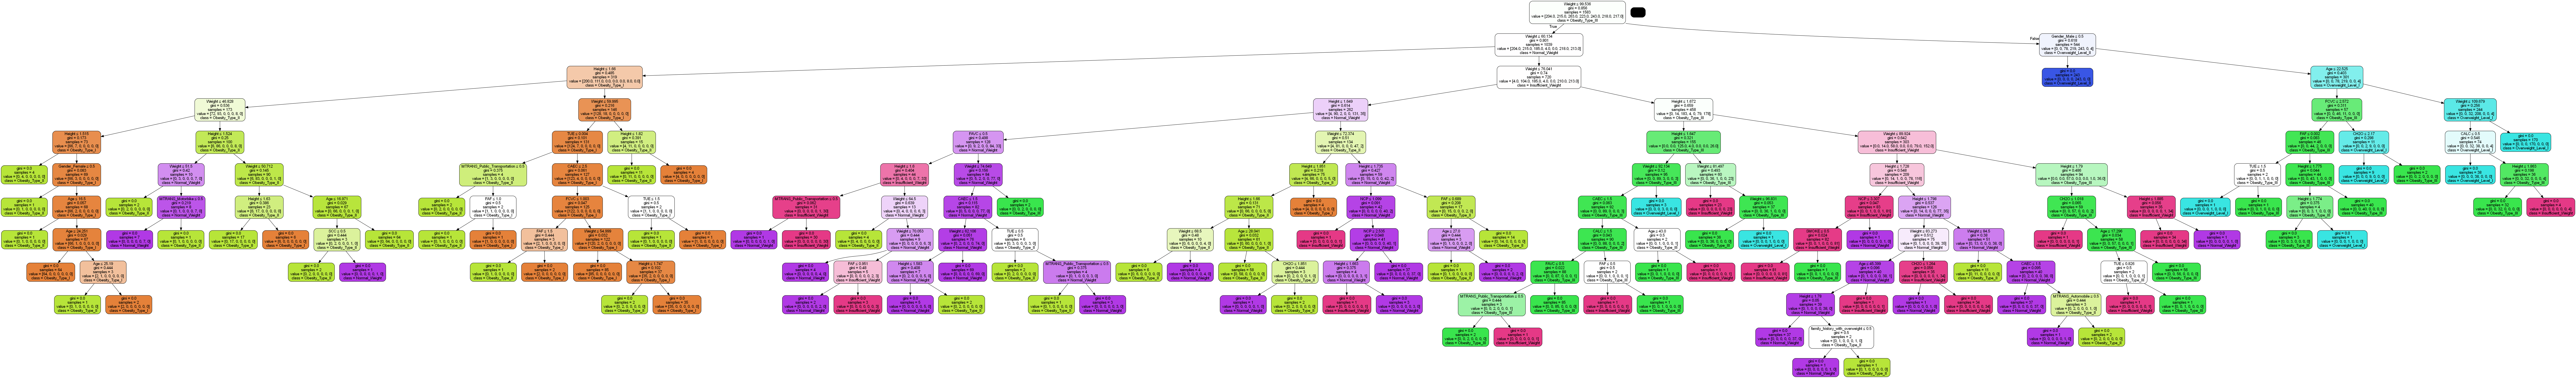

In [51]:
#Check the splits, gini values, and how the features were used of all the levels
dot_data = StringIO()

# Corrected export_graphviz call
export_graphviz(
    tree, 
    out_file=dot_data, 
    filled=True, 
    rounded=True,  # Capital "T"
    special_characters=True,  # Correct spelling
    feature_names=feature_names, 
    class_names=target_names
)

# Creating the graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save figure
graph.write_png('plots/DecisionTrees/obesityDecisionTree_depth10_encoded.png')


# Displaying the image
Image(graph.create_png())

In [52]:
#Create a cm for a encoded target variable

# Create a list of labels in the correct order
labels = list(category_order.keys())

cm_encoded = confusion_matrix(y_test_encoded, y_hat_encoded)

# Create the DataFrame with the category names as labels
cm_df = pd.DataFrame(cm_encoded, index=labels, columns=labels)

# Print the confusion matrix with readable labels
print("Confusion Matrix with Labels:")
print(cm_df)

Confusion Matrix with Labels:
                     Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
Insufficient_Weight                   65              3                   0   
Normal_Weight                          4             61                   7   
Overweight_Level_I                     0              4                  64   
Overweight_Level_II                    0              0                   6   
Obesity_Type_I                         0              0                   0   
Obesity_Type_II                        0              0                   0   
Obesity_Type_III                       0              0                   0   

                     Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
Insufficient_Weight                    0               0                0   
Normal_Weight                          0               0                0   
Overweight_Level_I                     4               0                0   
Overweight_Level_II          

- If the model needs to consider the ordinal nature explicitly, the encoded target should be chosen. 

## The end